===== VITERBI PHONEME DECODING =====
Observation Sequence: ['O1', 'O2', 'O3', 'O4']
Most Likely Phoneme Sequence: ['h', 'e', 'l', 'o']
Probability of the Most Likely Sequence: 0.037044

Inference: The model successfully recognized the phoneme pattern for the word 'hello'.


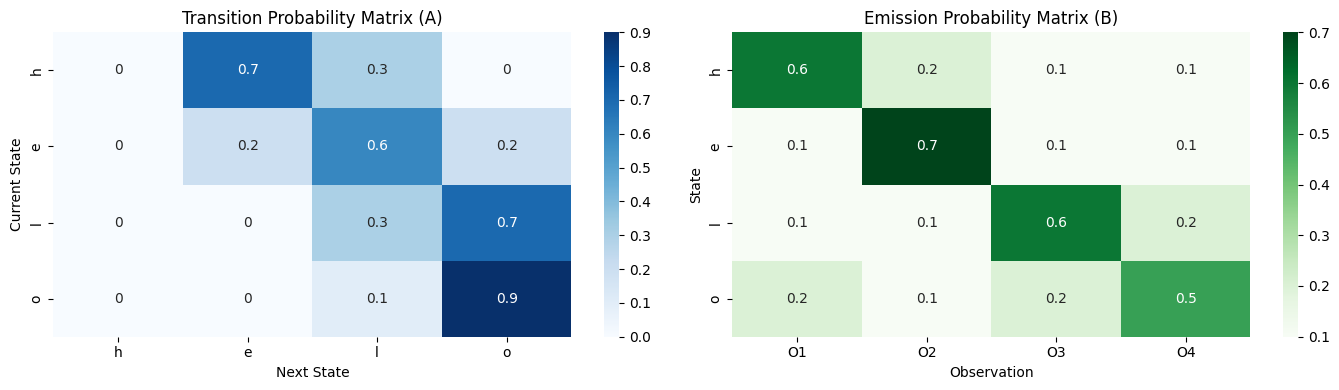

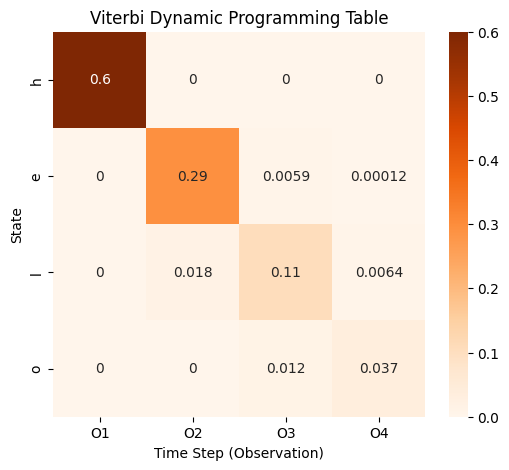

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# define HMM Parameters

# Hidden states (phonemes)
states = ['h', 'e', 'l', 'o']
num_states = len(states)

# Observations
observations = ['O1', 'O2', 'O3', 'O4']
obs_sequence = ['O1', 'O2', 'O3', 'O4']

# Transition Probability Matrix A
A = np.array([
    [0.0, 0.7, 0.3, 0.0],   # S1 (/h/)
    [0.0, 0.2, 0.6, 0.2],   # S2 (/e/)
    [0.0, 0.0, 0.3, 0.7],   # S3 (/l/)
    [0.0, 0.0, 0.1, 0.9]    # S4 (/o/)
])

# Emission Probability Matrix B
B = np.array([
    [0.6, 0.2, 0.1, 0.1],  # S1 emits O1,O2,O3,O4
    [0.1, 0.7, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.2],
    [0.2, 0.1, 0.2, 0.5]
])

# Initial Probability π
pi = np.array([1.0, 0.0, 0.0, 0.0])

# Map observations to index
obs_index = {obs: i for i, obs in enumerate(observations)}

# Viterbi Algorithm

T = len(obs_sequence)

# Dynamic programming tables
V = np.zeros((num_states, T))  # probabilities
path = np.zeros((num_states, T), dtype=int)  # best predecessor

# Initialization
for i in range(num_states):
    V[i, 0] = pi[i] * B[i, obs_index[obs_sequence[0]]]

# Recursion
for t in range(1, T):
    for s in range(num_states):
        transition_probs = V[:, t-1] * A[:, s]
        best_prev_state = np.argmax(transition_probs)
        V[s, t] = transition_probs[best_prev_state] * B[s, obs_index[obs_sequence[t]]]
        path[s, t] = best_prev_state

#  Termination
best_last_state = np.argmax(V[:, -1])
best_prob = V[best_last_state, -1]

#  Backtracking
best_path = [best_last_state]
for t in range(T - 1, 0, -1):
    best_last_state = path[best_last_state, t]
    best_path.insert(0, best_last_state)

decoded_sequence = [states[i] for i in best_path]


print("===== VITERBI PHONEME DECODING =====")
print(f"Observation Sequence: {obs_sequence}")
print(f"Most Likely Phoneme Sequence: {decoded_sequence}")
print(f"Probability of the Most Likely Sequence: {best_prob:.6f}")

if decoded_sequence == ['h', 'e', 'l', 'o']:
    print("\nInference: The model successfully recognized the phoneme pattern for the word 'hello'.")
else:
    print("\nInference: The decoded sequence does not correctly match expected pronunciation.")


plt.figure(figsize=(14, 4))

# Plot Transition Matrix
plt.subplot(1, 2, 1)
sns.heatmap(A, annot=True, cmap="Blues", xticklabels=states, yticklabels=states)
plt.title("Transition Probability Matrix (A)")
plt.xlabel("Next State")
plt.ylabel("Current State")

# Plot Emission Matrix
plt.subplot(1, 2, 2)
sns.heatmap(B, annot=True, cmap="Greens", xticklabels=observations, yticklabels=states)
plt.title("Emission Probability Matrix (B)")
plt.xlabel("Observation")
plt.ylabel("State")

plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5))
sns.heatmap(V, annot=True, cmap="Oranges", xticklabels=obs_sequence, yticklabels=states)
plt.title("Viterbi Dynamic Programming Table")
plt.xlabel("Time Step (Observation)")
plt.ylabel("State")
plt.show()
